In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests

# Import the API key.
from config import weather_api_key

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Code that generates the lagitude and longitude. 
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#print(coordinates)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

607

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Next, we need to iterate through our list of cities
# and begin building the URL for each city, 
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | atuona
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | kruisfontein
Processing Record 5 of Set 1 | san onofre
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | upernavik
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | quatre cocos
Processing Record 11 of Set 1 | jamestown
Processing Record 12 of Set 1 | cape town
Processing Record 13 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 14 of Set 1 | tsabong
Processing Record 15 of Set 1 | tasiilaq
Processing Record 16 of Set 1 | azua
Processing Record 17 of Set 1 | helong
Processing Record 18 of Set 1 | vila franca do campo
Processing Record 19 of Set 1 | nelson bay
Processing Record 20 of Set 1 | kapaa
Processing Record 21 of Set 1 | iqaluit
Processing Record 22 of Set 1 | olafsvik
Proces

Processing Record 35 of Set 4 | ilulissat
Processing Record 36 of Set 4 | samusu
City not found. Skipping...
Processing Record 37 of Set 4 | thompson
Processing Record 38 of Set 4 | klaksvik
Processing Record 39 of Set 4 | zeya
Processing Record 40 of Set 4 | kaohsiung
Processing Record 41 of Set 4 | ambilobe
Processing Record 42 of Set 4 | cameta
Processing Record 43 of Set 4 | sitka
Processing Record 44 of Set 4 | gizo
Processing Record 45 of Set 4 | vaini
Processing Record 46 of Set 4 | puerto escondido
Processing Record 47 of Set 4 | maniitsoq
Processing Record 48 of Set 4 | port keats
Processing Record 49 of Set 4 | qasigiannguit
Processing Record 50 of Set 4 | tidore
City not found. Skipping...
Processing Record 1 of Set 5 | ixtapa
Processing Record 2 of Set 5 | san patricio
Processing Record 3 of Set 5 | skibbereen
Processing Record 4 of Set 5 | muncar
Processing Record 5 of Set 5 | severo-kurilsk
Processing Record 6 of Set 5 | tashtyp
Processing Record 7 of Set 5 | longyearbyen

Processing Record 24 of Set 8 | luwingu
Processing Record 25 of Set 8 | beisfjord
Processing Record 26 of Set 8 | vanimo
Processing Record 27 of Set 8 | camacha
Processing Record 28 of Set 8 | kavaratti
Processing Record 29 of Set 8 | texarkana
Processing Record 30 of Set 8 | hagerstown
Processing Record 31 of Set 8 | fortuna
Processing Record 32 of Set 8 | hobbs
Processing Record 33 of Set 8 | jutai
Processing Record 34 of Set 8 | qui nhon
Processing Record 35 of Set 8 | ponta do sol
Processing Record 36 of Set 8 | joao pinheiro
Processing Record 37 of Set 8 | teknaf
Processing Record 38 of Set 8 | sao felix do xingu
Processing Record 39 of Set 8 | norman wells
Processing Record 40 of Set 8 | intipuca
Processing Record 41 of Set 8 | lazaro cardenas
Processing Record 42 of Set 8 | shelburne
Processing Record 43 of Set 8 | hashtrud
Processing Record 44 of Set 8 | bathsheba
Processing Record 45 of Set 8 | marienburg
Processing Record 46 of Set 8 | constitucion
Processing Record 47 of Set

Processing Record 8 of Set 12 | pauini
Processing Record 9 of Set 12 | mende
Processing Record 10 of Set 12 | sumbe
Processing Record 11 of Set 12 | santa maria
Processing Record 12 of Set 12 | calatrava
Processing Record 13 of Set 12 | dianopolis
City not found. Skipping...
Processing Record 14 of Set 12 | gazanjyk
Processing Record 15 of Set 12 | yuancheng
Processing Record 16 of Set 12 | yumen
Processing Record 17 of Set 12 | svetlyy
Processing Record 18 of Set 12 | berlin
Processing Record 19 of Set 12 | ust-maya
Processing Record 20 of Set 12 | sayat
Processing Record 21 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 22 of Set 12 | port blair
Processing Record 23 of Set 12 | prado
Processing Record 24 of Set 12 | katastarion
Processing Record 25 of Set 12 | zharkent
Processing Record 26 of Set 12 | ojiya
Processing Record 27 of Set 12 | waipawa
Processing Record 28 of Set 12 | cherskiy
Processing Record 29 of Set 12 | dvinskoy
Processing Record 30 of Set 12 | ji

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-32.73,100,70,2.73,RU,2021-12-17 02:08:36
1,Atuona,-9.8000,-139.0333,78.30,70,47,12.28,PF,2021-12-17 02:06:47
2,Hobart,-42.8794,147.3294,75.02,45,64,1.01,AU,2021-12-17 02:08:37
3,Kruisfontein,-34.0033,24.7314,53.89,71,98,5.88,ZA,2021-12-17 02:08:37
4,San Onofre,9.7359,-75.5263,78.57,85,100,3.15,CO,2021-12-17 02:08:38
5,Cidreira,-30.1811,-50.2056,68.36,91,22,9.35,BR,2021-12-17 02:08:38
6,Upernavik,72.7868,-56.1549,-0.99,93,100,4.83,GL,2021-12-17 02:08:39
7,Rikitea,-23.1203,-134.9692,75.81,72,45,16.44,PF,2021-12-17 02:08:39
8,Hilo,19.7297,-155.0900,79.29,36,1,5.75,US,2021-12-17 02:08:40
9,Quatre Cocos,-20.2078,57.7625,75.09,79,30,7.81,MU,2021-12-17 02:08:40


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")
city_data_df.info

<bound method DataFrame.info of              City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
0       Saskylakh  71.9167  114.0833    -32.73       100          70   
1          Atuona  -9.8000 -139.0333     78.30        70          47   
2          Hobart -42.8794  147.3294     75.02        45          64   
3    Kruisfontein -34.0033   24.7314     53.89        71          98   
4      San Onofre   9.7359  -75.5263     78.57        85         100   
..            ...      ...       ...       ...       ...         ...   
546         Maloy  61.9353    5.1136     48.72        87         100   
547    Hervey Bay -25.2986  152.8535     87.04        54           9   
548       Sumenep  -7.0167  113.8667     85.03        70          96   
549       Iquitos  -3.7481  -73.2472     77.04        88          20   
550         Lagoa  39.0500  -27.9833     59.50        74         100   

     Wind Speed Country                 Date  
0          2.73      RU  2021-12-17 02:08:36  
1        

In [10]:
new_column_order = ["City", "Cloudiness", "Country", "Date", "Humidity", "Lat", "Lng", "Max Temp", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,70,RU,2021-12-17 02:08:36,100,71.9167,114.0833,-32.73,2.73
1,Atuona,47,PF,2021-12-17 02:06:47,70,-9.8000,-139.0333,78.30,12.28
2,Hobart,64,AU,2021-12-17 02:08:37,45,-42.8794,147.3294,75.02,1.01
3,Kruisfontein,98,ZA,2021-12-17 02:08:37,71,-34.0033,24.7314,53.89,5.88
4,San Onofre,100,CO,2021-12-17 02:08:38,85,9.7359,-75.5263,78.57,3.15


In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

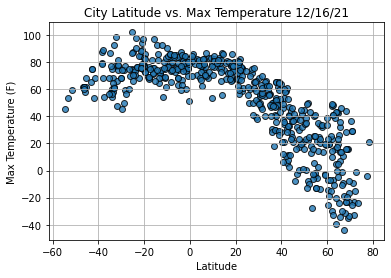

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

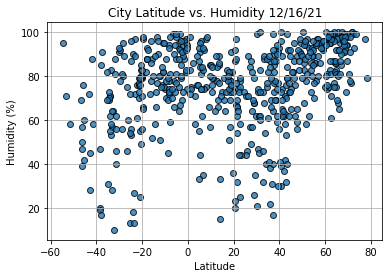

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

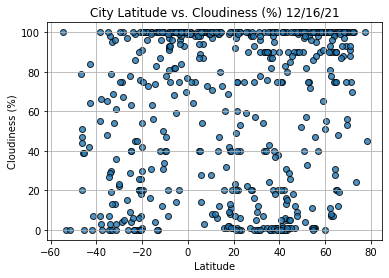

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

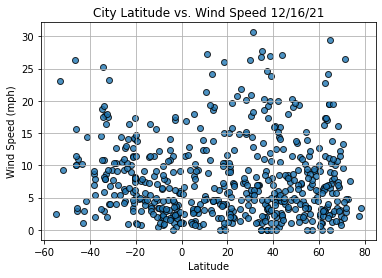

In [15]:
# for stem project
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create new dataframe from current dataframe to create
#the hemisphere dataframes
#The syntax to get a specific row from a current DataFrame is
index13 = city_data_df.loc[13]
index13


City                     Tasiilaq
Cloudiness                    100
Country                        GL
Date          2021-12-17 02:08:42
Humidity                       98
Lat                       65.6145
Lng                      -37.6368
Max Temp                    32.16
Wind Speed                   1.23
Name: 13, dtype: object

In [18]:
#We can also filter a DataFrame based on a value of a row. 
city_data_df["Lat"] >= 0

0       True
1      False
2      False
3      False
4       True
       ...  
546     True
547    False
548    False
549    False
550     True
Name: Lat, Length: 551, dtype: bool

In [19]:
# If we want to return a DataFrame with all 
#data fitting the criteria, for latitudes 
#greater than or equal to 0, we can use the loc method on the city_data_df
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Saskylakh,70,RU,2021-12-17 02:08:36,100,71.9167,114.0833,-32.73,2.73
4,San Onofre,100,CO,2021-12-17 02:08:38,85,9.7359,-75.5263,78.57,3.15
6,Upernavik,100,GL,2021-12-17 02:08:39,93,72.7868,-56.1549,-0.99,4.83
8,Hilo,1,US,2021-12-17 02:08:40,36,19.7297,-155.0900,79.29,5.75
10,Jamestown,20,US,2021-12-17 02:08:41,62,42.0970,-79.2353,58.32,20.00


In [20]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

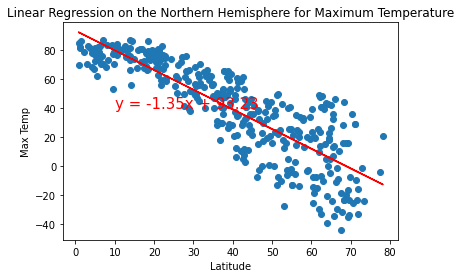

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

In [22]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]


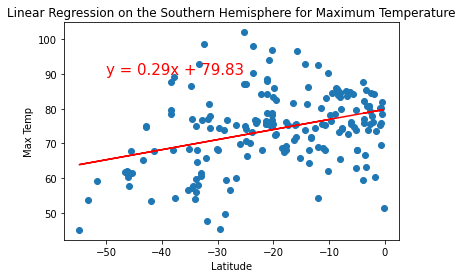

In [23]:
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

In [24]:
###Congratulations! You have plotted the regression line and equation for latitude and maximum temperature 
#for your Northern and Southern Hemispheres.
#The correlation between the latitude and the maximum 
#temperature is strong to very strong because the r-value 
#is less than –0.7 for the Northern Hemisphere and 
#greater than 0.7 for the Southern Hemisphere, as shown by the plots here.
#This means that as we approach the equator, 0° latitude, the temperatures become warmer. 
#And when we are further from the equator the temperatures become cooler. Check the r-values for your plots. 

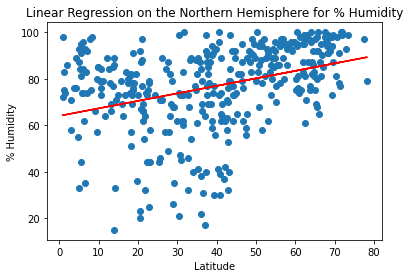

In [25]:
# Linear regression on the Northern Hemisphere % Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

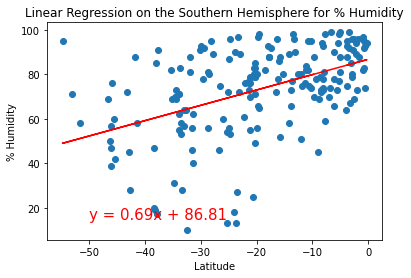

In [26]:
# Linear regression on the Southern Hemisphere % Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

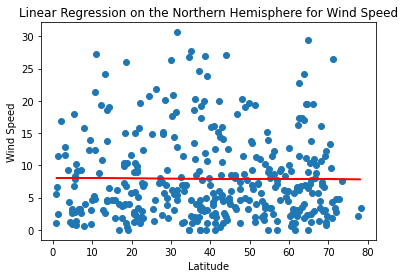

In [27]:
# Linear regression on the Northern Hemisphere Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

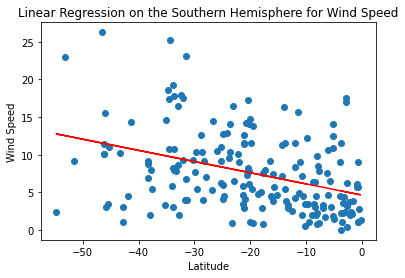

In [28]:
# Linear regression on the Southern Hemisphere Wind Speed
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))